# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/vehicles_us.csv') # Open dataset 
except:
    data = pd.read_csv('vehicles_us.csv')

In [3]:
data.head()  # View first 5 rows of the dataset
data[data['model_year'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [4]:
data.info() # view total number of data, each feature whether missing or not and the corresponding datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
data.duplicated().sum()  # check for duplicates

0

### Conclusion

    The dataset of vehicles has total of 51525 with 13 feature columns.The feature column model_year 
    has 47906 Non-Null values and 3619 missing values.Cylinders feature is also missing 5260 values and 46265 
    Non-Null values.The odometer has 43633 Non-Null vallues with 7892 missing values.paint_color also has 42258 
    non-null values with 9267 missing values.Finally, the feature is_4wd has 25572 Non-Null values with 25953
    missing values. <code style="background:yellow;color:black">There were no duplicates found in the dataset 
    after scrutinizing for duplicates</code>

### Step 2. Data preprocessing

In [6]:
data.isnull().sum() # check missing values among features

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [7]:
data['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [8]:
#Streamline varying vehicle models to conform to a single format
data.loc[data['model']=='ford f-250','model'] = 'ford f250'
data.loc[data['model']=='ford f-250 sd','model'] = 'ford f250 super duty'
data.loc[data['model']=='ford f-350 sd','model'] = 'ford f350 super duty'
data.loc[data['model']=='ford f-250 super duty','model'] = 'ford f250 super duty'

In [9]:
# Find the median year of vehicle model
median_model = data.groupby('model').agg({'model_year':['median']})
model_yr = median_model['model_year']['median']

In [10]:
#Replace missing values with median values of the year the vehicle was made
for model in data['model'].unique():
        data.loc[(data['model']== model ) & (data['model_year'].isnull()),'model_year']= model_yr[model]

In [11]:
# Find the median cylinders of vehicle types
median_cylinders = data.groupby('type').agg({'cylinders':['median']})
cylinder_vehicle = median_cylinders['cylinders']['median']

In [12]:
#Replace missing values of cylinders with the median value similar vehicles
for types in data['type'].unique():
        data.loc[(data['type']== types  ) & (data['cylinders'].isnull()),'cylinders']= cylinder_vehicle[types]

In [13]:
# Since electric cars don't use fuel and they rather use batteries i filled them with 0
data.loc[data['fuel']=='electric','cylinders']=0.0

In [14]:
#Find the median odometer of type of vehicles
median_odometer = data.groupby('type').agg({'odometer':['median']})
odometer_vehicle = median_odometer['odometer']['median']


In [15]:
# Replace missing odometer vlues with the median value of vehicles
for models in data['type'].unique():
        data.loc[(data['type']== models  ) & (data['odometer'].isnull()),'odometer']= odometer_vehicle[models]

In [16]:
#Find the frequently used color/paint used for types of vehicles
paint_mode = data.groupby('model')['paint_color'].agg(
    lambda x: pd.Series.mode(x)[0])

In [17]:
#Replace missing colors with frequently used colors used by most vehicles
for models in data['model'].unique():
        data.loc[(data['model']== models  ) & (data['paint_color'].isnull()),'paint_color']= paint_mode[models]

In [18]:
# Replace all missing 4wd values with zero(0)
data['is_4wd'] = data['is_4wd'].fillna(0)

In [19]:
# Change the datatypes of model_year,cylinders is_4wd, odometer and 
#change date_posted  from object type to date type
data['model_year'] = data['model_year'].astype('int16')
data['cylinders'] = data['cylinders'].astype('int16')
data['is_4wd'] = data['is_4wd'].astype('int16')
data['odometer'] = data['odometer'].astype('int64')
data['date_posted'] = pd.to_datetime(data['date_posted'],format=('%Y-%m-%d'))

In [20]:
data.duplicated().sum()  # check for duplicates

0

In [21]:
# Set the various vehicles to digit representation
def type_code(var):
    if var == 'SUV':
        return 1
    elif var== 'pickup':
        return 2
    elif var== 'sedan':
        return 3
    elif var== 'truck':
        return 4
    elif var== 'coupe':
        return 5
    elif var== 'van':
        return 6
    elif var== 'convertible':
        return 7
    elif var== 'hatchback':
        return 8
    elif var== 'wagon':
        return 9
    elif var== 'mini-van':
        return 10
    elif var== 'other':
        return 11
    elif var== 'offroad':
        return 12
    else:
        return 13

In [22]:
data['type_coded'] = data['type'].apply(type_code)


   # Conclusion
   
    The dataset of vehicles has total of 51525 with 13 feature columns.The feature column model_year has 47906 Non-Null
    values and 3619 missing values.Cylinders feature has  5260 missing values and 46265 Non-Null values.The odometer 
    has 43633 Non-Null values with 7892 missing values.paint_color also has 42258 non-null values with 9267 missing 
    values.Also, the feature is_4wd has 25572 Non-Null values with 25953 missing values.
    
    Type of vehicles was also categorized into digits starting from 1 to 13.Median of price feature was used because
    the average price of a vehicle is 12132 which is greater than the median price of vehicles which is 9000.
    This means that there are bigger price values of vehicles which is determining the average value of the vehicle.
    The mode value of all types of vehicles was used to replace missing values for paint_values feature.From the data 
    set it can be seen that the model_year feature had more missing values this can be attributed to the floating point 
    datatype of the feature.
    Also with regards to is4wd feature the missing values can be attributed to the fact that the 
    datatype was boolean in the database hence whiles converting to an integer, only one booleen value might have been in 
    stored that is  True hence the missing value automatic is False which can be translated as zero(0) .


    
Please see additional links: https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html, https://thispointer.com/python-pandas-count-number-of-nan-or-missing-values-in-dataframe-also-row-column-wise/,
https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/ 


### Step 3. Make calculations and add them to the table

In [23]:
data['day_of_ad'] = data['date_posted'].dt.weekday # days start from monday with value 0 to sunday 6 respectively
data['month_of_ad'] = data['date_posted'].dt.month  
data['year_of_ad'] = data['date_posted'].dt.year


In [24]:
#subtract year of modeled vehicles from year advertisment of vehicles were published 
data['vehicle_age_yrs'] = data['year_of_ad'] - data['model_year'] 

In [25]:
# Find the mileage per year of every vehicle
def mileage(row):
    try:
        value = row[6] / row[16]
        return value
    except ZeroDivisionError:
        return 0

In [26]:
data['mileage_per_yr'] = data.apply(mileage,axis=1)
data['mileage_per_yr'] = data['mileage_per_yr'].astype('int64') # change datatype to int64

In [27]:
# change conditions of vehicles to their repective codes from 0 to 1 respectively
def conditions(value):
    if value == 'new':
        return 5
    elif value == 'like new':
        return 4
    elif value == 'excellent':
        return 3
    elif value == 'good':
        return 2
    elif value == 'fair':
        return 1
    else:
        return 0

In [28]:
data['condition_new'] = data['condition'].apply(conditions)

# Conclusion

    Date posted variable was engineered into months, days, and years the advertisement of all vehicle was published.
    Each vehicles mileage per hour was calculated as well as the condition of each vehicle was coded from 0 - 5
    respectively."New" vehicles coded with 5, whiles "like new" coded with 4.Furthermore, "excellent" vehicles
    with 3 , good vehicles with 2 and "fair" vehicles with 0. 

### Step 4. Carry out exploratory data analysis

In [29]:
# Copy dataset into a new dataframe
df = data.copy() 

#Drop categorical variables in the copied dataset
df.drop(columns=['model_year','condition','model','fuel','transmission','type','paint_color','date_posted'],inplace=True)

#Create a categorical dataset from the existing dataset
category_data = data[['price','transmission','paint_color']]


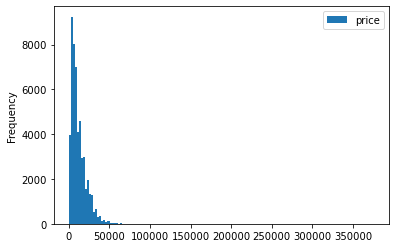

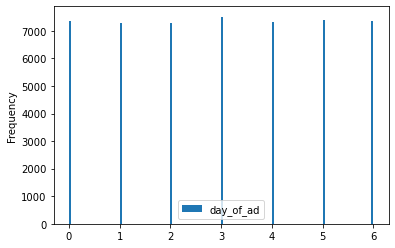

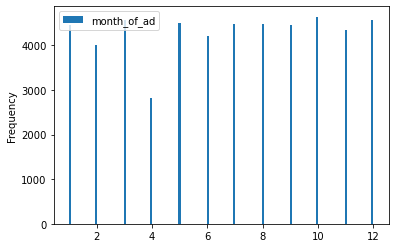

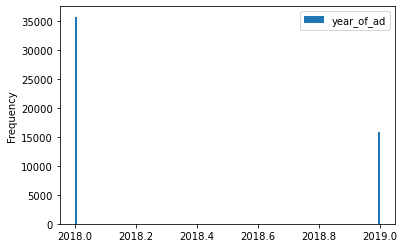

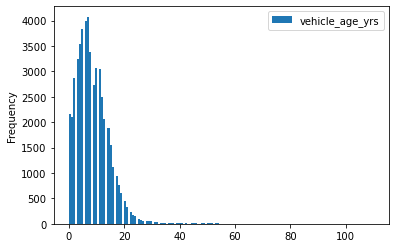

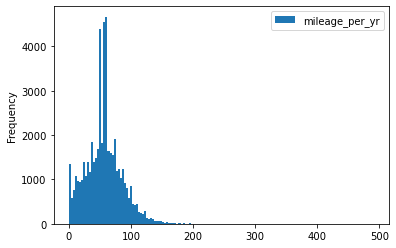

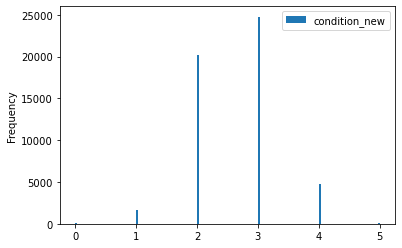

In [30]:
#Store features in a list
features = ['price','day_of_ad', 'month_of_ad', 'year_of_ad','vehicle_age_yrs', 'mileage_per_yr', 'condition_new']

#plot a histogram of price,day, month,year advertisement was published,age of vehicle
#mileage per year and condition of the vehicle.
for i in features:
    df.plot(y=i,kind='hist', bins=150)
    

In [31]:
data['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

# Conclusion

    According to the histogram, most of the prices of vehicles were between 4900 and 5000; the price was in the range 
    of  than 1300 times during the publication of the ad.The second most frequently observed price of vehicles were 
    between 6900 and 7000 and the price landed in the range for 1200 times.The third most frequently observed price of 
    vehicle were 7900 and 8000.The fourth most frequently observed price were between 4900 and 5000 as well as 5900 and 
    6000.Based on the graph, the mean and the median price were a little far from  4900 and 5000 range. 
    The actual mean was 12132 whereas the median was 9000. Since the mean exceeds the median, the distribution of the 
    prices for published vehicles was positively skewed. This shows the likelihood of an extremely larger prices than 
    low prices of vehicles.
    
    In addition to this the days on which ads were published are uniformly distributed with a frequency of 75000 which 
    indicates that the publication of ads was consistent across all the days.
    Also the greatest number of ads were published in the month of January,March,May,July,August,September,october and 
    december than any other month,whiles march had the lowest number of ads published at a frequency of 28000.
    Most of the ads were published in 2018 at a frequency of 36000 and the least in 2019 at a frequency of 15000.
    Most vehicles advertised  were between the ages of 0 and 18 yrs with a few vehicles between the ages of  19 and 58.
    This also tells us that most of the vehicles are not over age vehicles.
    Furthermore, the histogram representing mileage is skewed to the right.This also shows that majority of vehicles 
    traveled between 2000 and 30000 miles in a year.With only a few  traveling from 40000 to 60000 miles in a year.

In [32]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [33]:
good_data = df[(df < (Q3 + 1.5 * IQR))]
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            49879 non-null  float64
 1   cylinders        51525 non-null  int16  
 2   odometer         50485 non-null  float64
 3   is_4wd           51525 non-null  int16  
 4   days_listed      49824 non-null  float64
 5   type_coded       46836 non-null  float64
 6   day_of_ad        51525 non-null  int64  
 7   month_of_ad      51525 non-null  int64  
 8   year_of_ad       51525 non-null  int64  
 9   vehicle_age_yrs  50638 non-null  float64
 10  mileage_per_yr   50384 non-null  float64
 11  condition_new    51382 non-null  float64
dtypes: float64(7), int16(2), int64(3)
memory usage: 4.1 MB


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please see for details: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba 
</div>

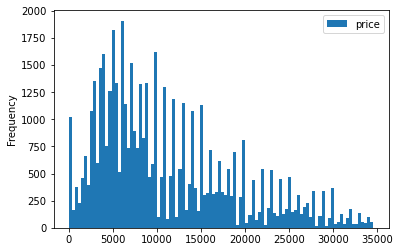

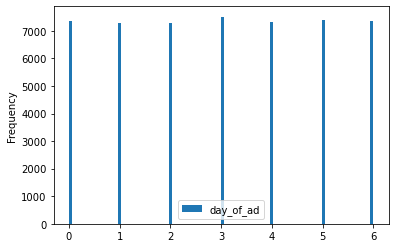

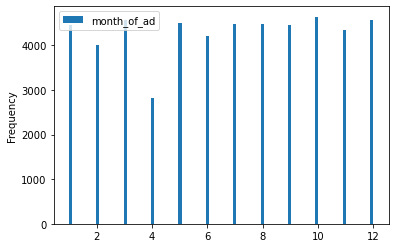

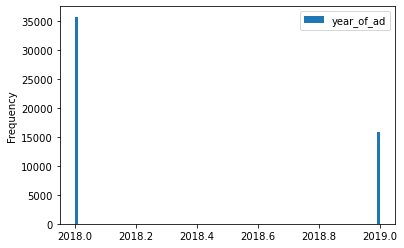

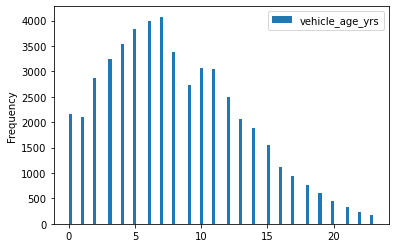

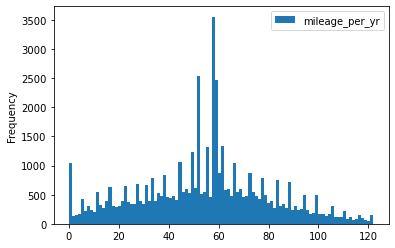

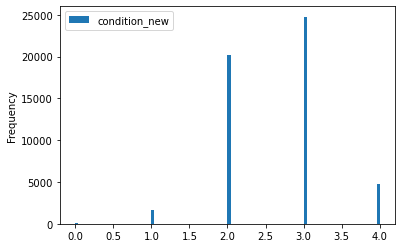

In [34]:
for i in features:
    good_data.plot(y=i,kind='hist', bins=100)

# Conclusion

    According to the histogram, most of the prices of vehicles advertised were between 0 and 15000 at a frequent
    rate of 1800 times during the publication of the ad.Based on the graph, the mean and the median price were a 
    little far from  7000 and 9000 range. The previous actual mean of the data with outliers was 12132 whereas the 
    median was 9000, but after outliers were removed the distribution of the data moved a little closer to the mean.
    The mean after removing outliers reduces to 11095 whiles the median also reduces to 8990.Even though the mean 
    still exceeds the median but the distance has reduced.The mean still exceeds the median therefore the  distribution
    of the prices for published vehicles was positively skewed. This shows the likelihood of an extremely larger 
    prices than lower prices of vehicles.
    
    In addition to this the days on which ads were published are uniformly distributed with a frequency of 75000 which
    indicates that the publication of ads was consistent across all the days.
    Also the greatest number of ads were published in the month of and october and december and then followed by
    January,March,May,July,August,September.The month in which the least number of ads were published in march.
    Most of the ads were published in 2018 at a frequency of 36000 and the least in 2019 at a frequency of 15000.
    Most vehicles advertised  were between the ages of 0 and 14 yrs with a few vehicles between the ages of  15 
    and 20.This also tells us that most of the vehicles are not over age vehicles.
    Furthermore, the histogram representing mileage is slightly skewed to the right.This also shows that majority 
    of vehicles traveled between 5000 and 20000 miles in a year.With only a few  traveling from 25000 to 35000 miles 
    in a year.

<AxesSubplot:ylabel='Frequency'>

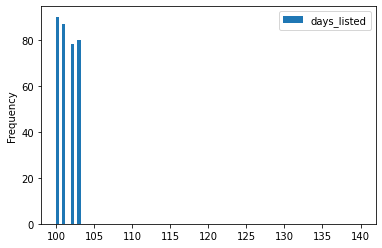

In [35]:
# Number of days advetisement was displayed
good_data.plot(y='days_listed',kind='hist', bins=100,range=(100,140))

In [36]:
good_data.groupby('day_of_ad')['days_listed'].min()

day_of_ad
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: days_listed, dtype: float64

In [37]:
data[data['days_listed'] == 0]


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,type_coded,day_of_ad,month_of_ad,year_of_ad,vehicle_age_yrs,mileage_per_yr,condition_new
1247,14995,2008,chevrolet silverado 1500,excellent,8,gas,93300,automatic,truck,grey,1,2018-05-15,0,4,1,5,2018,10,46,3
1711,59589,2019,chevrolet silverado 2500hd,excellent,8,diesel,120000,automatic,truck,white,1,2019-01-13,0,4,6,1,2019,0,59,3
1983,14000,1999,ford f250,excellent,8,diesel,137500,automatic,truck,red,1,2018-09-27,0,4,3,9,2018,19,68,3
2883,4000,2004,ram 1500,excellent,8,gas,250000,automatic,truck,brown,1,2018-08-13,0,4,0,8,2018,14,123,3
3965,16750,1985,chevrolet corvette,like new,8,gas,24540,automatic,hatchback,white,0,2018-10-14,0,8,6,10,2018,33,12,4
4567,5000,2007,toyota corolla,good,4,gas,223000,manual,sedan,silver,0,2018-07-11,0,3,2,7,2018,11,110,2
4901,12500,2001,ram 1500,good,8,gas,99892,automatic,truck,black,1,2018-05-11,0,4,4,5,2018,17,49,2
6114,500,2003,dodge dakota,fair,6,gas,215457,automatic,pickup,silver,0,2018-10-31,0,2,2,10,2018,15,106,1
6548,4800,2007,honda odyssey,good,6,gas,152400,automatic,mini-van,brown,0,2018-09-25,0,10,1,9,2018,11,75,2
7036,5900,2007,jeep grand cherokee laredo,excellent,6,gas,118865,automatic,SUV,grey,1,2018-07-21,0,1,5,7,2018,11,58,3


# Conclusion

    In the histogram many ads listed between 18 to 40 days with a frequency between 800 and 900.The average days per ads 
    is 36 days. Some ads were listed abnormally for 50 to 100 days.It can also been seen that on day 3 which is thursday
    most ads were listed abnormally longer time compared to other days, whiles day 2 which is Wednesday most ads
    were removed.<code Furthermore it can also be realized from the plot that the least number of days on which ads were 
    abnormally removed is 0 meaning the ads never lasted a day but probably lasted some hours, minutes, or seconds.
    Also the number of days where ads were listed for an abnormally long time is 103 days.

In [38]:
good_data['days_listed'].describe()

count    49824.000000
mean        36.559770
std         23.039761
min          0.000000
25%         18.000000
50%         32.000000
75%         51.000000
max        103.000000
Name: days_listed, dtype: float64

In [39]:
#Count the number of listed ads per type and the average price of each type of vehicle
# Filter the most vehicles with the greatest number of days listed on ads
ad_vehicle = good_data.groupby('type_coded').agg({'day_of_ad':'count','price':'mean'})  
ad_vehicle.sort_values('day_of_ad',ascending=False,inplace=True)
ad_vehicle['price']=round(ad_vehicle['price'])
ad_vehicle

,day_of_ad,price
type_coded,,
1.0,12405,10360.0
4.0,12353,14821.0
3.0,12154,6942.0
2.0,6988,14610.0
5.0,2303,13269.0
6.0,633,8743.0


In [40]:
vehicle_ad = good_data.query('type_coded==1 or type_coded==4')
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            49879 non-null  float64
 1   cylinders        51525 non-null  int16  
 2   odometer         50485 non-null  float64
 3   is_4wd           51525 non-null  int16  
 4   days_listed      49824 non-null  float64
 5   type_coded       46836 non-null  float64
 6   day_of_ad        51525 non-null  int64  
 7   month_of_ad      51525 non-null  int64  
 8   year_of_ad       51525 non-null  int64  
 9   vehicle_age_yrs  50638 non-null  float64
 10  mileage_per_yr   50384 non-null  float64
 11  condition_new    51382 non-null  float64
dtypes: float64(7), int16(2), int64(3)
memory usage: 4.1 MB


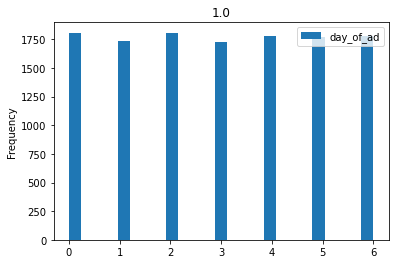

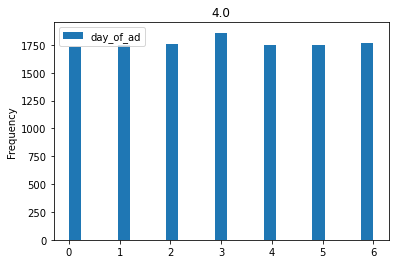

In [41]:
for name, group_data in vehicle_ad.groupby('type_coded'):
    group_data.plot(kind='hist',y='day_of_ad',title=name, bins = 25)

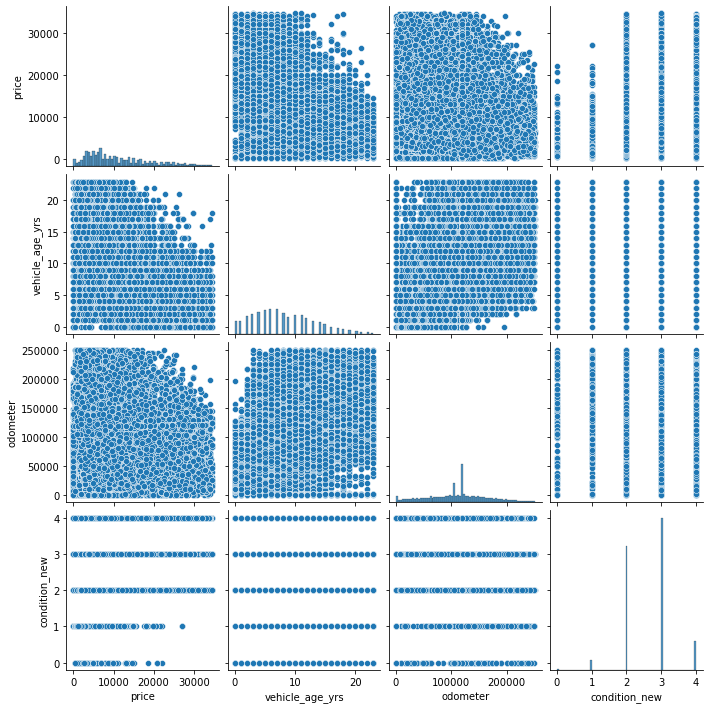

In [42]:
# Scatter plots
sns.pairplot(good_data[['price', 'vehicle_age_yrs', 'odometer','condition_new']])


# Conclusion

    From the scatter diagram the condition of a vehicle affect the price of the vehicle.A vehicle with "like new" 
    - 4,"excellent" - 3,"good" - 2 has the highest price of vehicles above 30000. "Fair" - 1 vehicles with a price of 
    28000 and "salvage" - 0 vehicles having the price 25000.
    Also, vehicles with lower mileage turns to have higher prices.From the plot it shows that all vehicles with mileage
    lower than 200000 are more expensive than vehicles having mileage greater than 200000.
    In addition to this, vehicles between the ages of 0 and 12 years are more expensive which is about 38000.
    Whereas vehicles older than 12 years drops in price between 1 and 20000.
    Hence from this plot it can be realized that the age of a vehicle, the mileage and its condition all affect the prices 
    of vehicles.

<AxesSubplot:xlabel='paint_color', ylabel='price'>

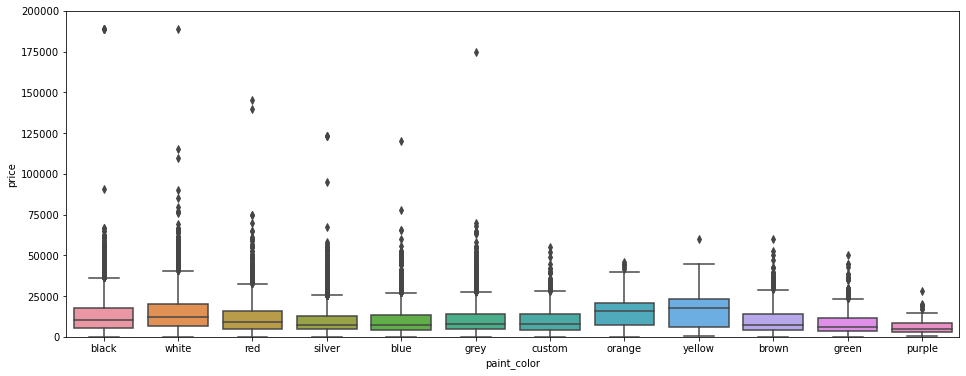

In [43]:
plt.figure(figsize=(16, 6))
plt.ylim(0, 200000)
sns.boxplot(x = 'paint_color', y = 'price', data = category_data) 

# Conclusion

    The relationship between price of vehicle and and its color  can be shown that vehicles with black color the 
    distribution of vehicles are positively skewed.The outliers of black vehicles also shows that they are not widely
    scattered. The interquatile range between black vehicles and white vehicles suggest that white vehicles are more 
    dispersed than black vehicles, eventhough white vehicles are also positively skewed.Red, blue,custom and brown 
    vehicles are positively skewed that is skewed right.Also they are less dispersed compared to white vehicles.
    
    In addition to this both silver and green vehicles are also positively skewed with less distribution.Yellow vehicles
    on the other is negatively skewed whereas orange vehicles are also negatively skewed.Having a critical look at yellow
    and orange vehicles, it can be seen that their median values are lie outside the box of green,brown,purple,silver,
    custom ,grey and red boxes which means that orange and yellow are of different groups from the color of vehicles listed.

<AxesSubplot:xlabel='transmission', ylabel='price'>

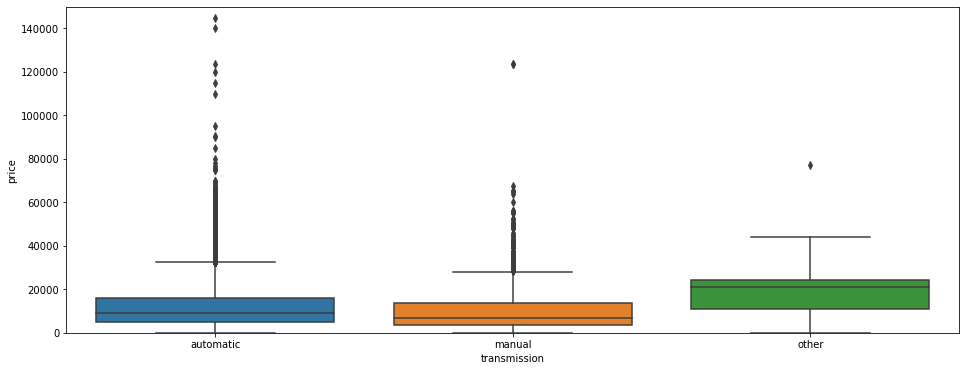

In [44]:
plt.figure(figsize=(16, 6))
plt.ylim(0, 150000)
sns.boxplot(x = 'transmission', y = 'price', data = category_data) 

# Conclusion

    From the boxplot automatic vehicles destribution is  positively skewed(skewed right). Also the data with regards to
    automatic vehicles are less dispersed.It has more outliers than other vehicles.Manual transmission vehicles are also
    positively skewed which are also less dispersed.Finally, other transmission vehicles are negatively skewed(left skewed). 
    Also outliers shows that the dataset for other vehicles are widely dispersed. 

<AxesSubplot:>

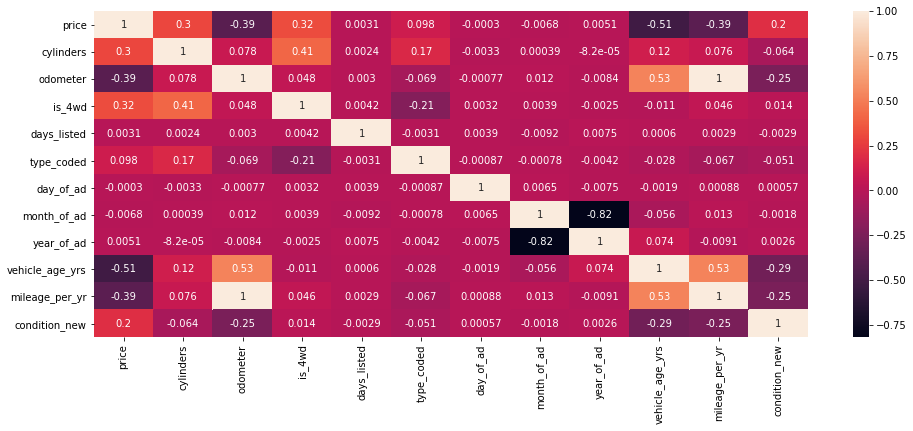

In [45]:
plt.figure(figsize=(16, 6))
corrMatrix =good_data.corr()
sns.heatmap(corrMatrix,annot=True)

# Conclusion

    -0.39 is coefficient matrix between the feature price and mileage of a vehicle.This shows that there is a weak 
    negative correlation between price and mileage.This means as the mileage of a vehicle increases the price of the 
    vehicle reduces and also vehicles with less record of mileage are the most expensive meaning their price increases.
    
    The coeffient of -0.51 is the matrix between price and age of a vehicle.This shows that there is a medium negative 
    correlation between the price and age of a vehicle.This also means that as a vehicles age increases its value 
    reduces whereas, a vehicle not old in age increases in value.

# Step 5. Overall conclusion

The dataset of vehicles has total of 51525 with 13 feature columns.The feature column model_year has 47906 Non-Null values and 3619 missing values.Cylinders feature has  5260 missing values and 46265 Non-Null values.The odometer has 43633 Non-Null values with 7892 missing values.paint_color also has 42258 non-null values with 9267 missing values.Finally, the feature is_4wd has 25572 Non-Null values with 25953 missing values.Type of vehicles was also categorized into digits starting from 1 to 13.Median of price feature was used because the average price of a vehicle is 12132 which is greater than the median price of vehicles which is 9000.This means that there are bigger price values of vehicles which is determining the average value of the vehicle.The mode value of all types of vehicles was used to replace missing values for paint_values feature. From the data set it can be seen that the model_year feature had more missing values this can be attributed to the floating point datatype of the feature.Also with regards to is4wd feature the missing values can be attributed to the fact that the datatype was boolean in the database hence whiles converting to an integer, only one booleen value might have been in stored that is  True hence the missing value automatic is False which can be translated as zero(0)

Furthermore,Date_posted variable was engineered into months, days, and years the advertisement of all vehicles were published.Each vehicles mileage per hour was calculated as well as the condition of each vehicle was coded from 0 - 5 respectively."New" vehicles coded with 5, whiles "like new" coded with 4.Furthermore, "excellent" vehicles with 3 , good vehicles with 2 and "fair" vehicles with 0. 

## Dataset with outliers
In addition to this,According to the histogram without the removal of outliers most of the prices of vehicles were between 4900 and 5000; the price was in the range of  than 1300 times during the publication of the ad.The second most frequently observed price of vehicles were between 6900 and 7000 and the price landed in the range for 1200 times.The third most frequently observed price of vehicle were 7900 and 8000.The fourth most frequently observed price were between 4900 and 5000 as well as 5900 and 6000.Based on the graph, the mean and the median price were a little far from  4900 and 5000 range. The actual mean was 12132 whereas the median was 9000. Since the mean exceeds the median, the distribution of the prices for published vehicles was positively skewed. This shows the likelihood of an extremely larger prices than low prices of vehicles.
In addition to this the days on which ads were published are uniformly distributed with a frequency of 75000 which indicates that the publication of ads was consistent across all the days.
Also the greatest number of ads were published in the month of January,March,May,July,August,September,october and december than any other month,whiles march had the lowest number of ads published at a frequency of 28000.Most of the ads were published in 2018 at a frequency of 36000 and the least in 2019 at a frequency of 15000.Most vehicles advertised  were between the ages of 0 and 18 yrs with a few vehicles between the ages of  19 and 58.This also tells us that most of the vehicles are not over age vehicles.
Furthermore, the histogram representing mileage is skewed to the right.This also shows that majority of vehicles traveled between 2000 and 30000 miles in a year.With only a few  traveling from 40000 to 60000 miles in a year.


## Dataset without outliers
According to the histogram, most of the prices of vehicles advertised were between 0 and 15000 at a frequent rate of 1800 times during the publication of the ad.Based on the graph, the mean and the median price were a little far from  7000 and 9000 range. The previous actual mean of the data with outliers was 12132 whereas the median was 9000, but after outliers were removed the distribution of the data moved a little closer to the mean.The mean after removing outliers reduces to 11095 whiles the median also reduces to 8990.Even though the mean still exceeds the median but the distance has reduced.The mean still exceeds the median therefore the  distribution of the prices for published vehicles was positively skewed. This shows the likelihood of an extremely larger prices than lower prices of vehicles.
In addition to this the days on which ads were published are uniformly distributed with a frequency of 75000 which indicates that the publication of ads was consistent across all the days.
Also the greatest number of ads were published in the month of and october and december and then followed by January,March,May,July,August,September.The month in which the least number of ads were published in march .Most of the ads were published in 2018 at a frequency of 36000 and the least in 2019 at a frequency of 15000.Most vehicles advertised  were between the ages of 0 and 14 yrs with a few vehicles between the ages of  15 and 20.This also tells us that most of the vehicles are not over age vehicles.
Furthermore, the histogram representing mileage is slightly skewed to the right.This also shows that majority of vehicles traveled between 5000 and 20000 miles in a year.With only a few  traveling from 25000 to 35000 miles in a year.

## Abnormal days of Advertisement listed
In the histogram many ads listed between 18 to 40 days with a frequency between 800 and 900.The average days per ads is 36 days. Some ads were listed abnormally for 50 to 100 days.It can also been seen that on day 3 which is thursday most ads were listed abnormally longer time compared to other days, whiles day 2 which is Wednesday most ads were removed

## Scatter diagram of quantitative features
From the scatter diagram the condition of a vehicle affect the price of the vehicle.A vehicle with "like new" - 4,"excellent" - 3,"good" - 2 has the highest price of vehicles above 30000. "Fair" - 1 vehicles with a price of 28000 and "salvage" - 0 vehicles having the price 25000.
Also, vehicles with lower mileage turns to have higher prices.From the plot it shows that all vehicles with mileage lower than 200000 are more expensive than vehicles having mileage greater than 200000.
In addition to this, vehicles between the ages of 0 and 12 years are more expensive which is about 38000.Whereas vehicles older than 12 years drops in price between 1 and 20000.
Hence from this plot it can be realized that the age of a vehicle, the mileage and its condition all affect the prices of vehicles.

## Boxplot of Paint Colors and Price of Vehicles
The relationship between price of vehicle and and its color  can be shown that vehicles with black color the distribution of vehicles are positively skewed.The outliers of black vehicles also shows that they are not widely scattered. The interquatile range between black vehicles and white vehicles suggest that white vehicles are more dispersed than black vehicles, eventhough white vehicles are also positively skewed.Red, blue,custom and brown vehicles are positively skewed that is skewed right.Also they are less dispersed compared to white vehicles.
In addition to this both silver and green vehicles are also positively skewed with less distribution.Yellow vehicles on the other is negatively skewed whereas orange vehicles are also negatively skewed.Having a critical look at yellow and orange vehicles, it can be seen that their median values are lie outside the box of green,brown,purple,silver,custom ,grey and red boxes which means that orange and yellow are of different groups from the color of vehicles listed.

## Boxplot of vehicles transmission and price of vehicle
From the boxplot automatic vehicles destribution is  positively skewed(skewed right). Also the data with regards to automatic vehicles are less dispersed.It has more outliers than other vehicles.Manual transmission vehicles are also positively skewed which are also less dispersed.Finally, other transmission vehicles are negatively skewed(left skewed). Also outliers shows that the dataset for other vehicles are widely dispersed.

## Correlation Matrix 
-0.39 is coefficient matrix between the feature price and mileage of a vehicle.This shows that there is a weak negative correlation between price and mileage.This means as the mileage of a vehicle increases the price of the vehicle reduces and also vehicles with less record of mileage are the most expensive meaning their price increases.
The coeffient of -0.51 is the matrix between price and age of a vehicle.This shows that there is a medium negative correlation between the price and age of a vehicle.This also means that as a vehicles age increases its value reduces whereas, a vehicle not old in age increases in value.

In conclusion it can be deducd that the age of a vehicle, condition and mileage have adverse effect on the price of vehicles.





### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn